##### Figure S8: gene enrichment results, as analyzed with gowinda, from putative sweep regigons

In [1]:
from collections import defaultdict
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import re

import itertools
import seaborn as sns

import ingenos

In [2]:
base_path = "/overflow/dschridelab/users/rrlove/aedes/"
results_path = f"{base_path}results/"
gowinda_output_path = f"{results_path}sweepfinder/genes/gowinda_outputs/"

In [3]:
countries = ["Brazil", "Colombia", "Gabon", "Kenya", "Senegal", "USA"]

##### read in each file

In [4]:
raw_dict = defaultdict(dict)

for country in countries:
    
    country_base_path = Path(f"{gowinda_output_path}{country}")
        
    in_paths = country_base_path.glob('./*99_pct_*_buffer.121322.txt')
        
    for in_path in in_paths:
        
        buffer = re.sub(".121322", "", in_path.stem).split("_pct_")[1]
        
        in_table = pd.read_table(in_path, header=None, 
                                 names = ["GO_term", "n_genes_per_sim", "n_genes_in_input", 
                                          "p-value", "q-value", "n_genes_in_input_unique", 
                                          "n_genes_with_site", "n_genes_per_term", 
                                          "description", "genes"])
        
        in_table["country"] = country
        
        in_table["buffer"] = buffer
        
        print(np.sum(in_table["n_genes_in_input"] != in_table["n_genes_in_input_unique"]))
        
        raw_dict[country][buffer] = in_table

0
0
0
0
0
0
0
0
0
0
0
0


##### narrow to GO terms with a q-value equal to or less than 0.05 in any country

In [5]:
trimmed_dict = defaultdict(dict)

for country in raw_dict.keys():
    
    for buffer, df in raw_dict[country].items():
            
        df = df.loc[(df["q-value"] <= 0.05)]

        df["description"] = df["description"].astype(str)

        trimmed_dict[country][buffer] = df[["GO_term","description","buffer"]]

<ipython-input-5-78ec0bdb3686>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["description"] = df["description"].astype(str)
<ipython-input-5-78ec0bdb3686>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["description"] = df["description"].astype(str)
<ipython-input-5-78ec0bdb3686>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

##### get the list of all GO terms enriched in any country, with or without the buffer

In [6]:
terms = {}

for buffer in ["1_kb_buffer", "no_buffer"]:
    
    terms[buffer] = \
    np.unique(
        np.concatenate(
            [trimmed_dict[country][buffer]["description"].values \
                for country in countries]))

terms[buffer]

array(['DNA binding', 'DNA-templated transcription, initiation',
       'Golgi transport complex', 'adenosine catabolic process',
       'adenosine deaminase activity', 'cellular iron ion homeostasis',
       'chromosome', 'deaminase activity',
       'detection of chemical stimulus involved in sensory perception of smell',
       'disulfide oxidoreductase activity', 'ferric iron binding',
       'ferroxidase activity', 'glutathione biosynthetic process',
       'host cell nucleus',
       'hydrolase activity, acting on carbon-nitrogen (but not peptide) bonds, in linear amides',
       'integral component of Golgi membrane', 'iron ion transport',
       'mitochondrial electron transport, ubiquinol to cytochrome c',
       'mitochondrial respiratory chain complex III',
       'mitochondrial translation', 'nitrogen compound metabolic process',
       'nucleosome', 'nucleosome assembly', 'nucleus', 'odorant binding',
       'olfactory receptor activity',
       'oxidoreductase activity, a

##### for each enriched term, record whether it was enriched in a particular country and with or without the buffer

In [7]:
terms_df_no_buffer = pd.DataFrame(index=terms["no_buffer"], 
                                  columns=countries, dtype=float)

terms_df_no_buffer.head()

,Brazil,Colombia,Gabon,Kenya,Senegal,USA
DNA binding,NaN,NaN,NaN,NaN,NaN,NaN
"DNA-templated transcription, initiation",NaN,NaN,NaN,NaN,NaN,NaN
Golgi transport complex,NaN,NaN,NaN,NaN,NaN,NaN
adenosine catabolic process,NaN,NaN,NaN,NaN,NaN,NaN
adenosine deaminase activity,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
terms_df_buffer = pd.DataFrame(index=terms["1_kb_buffer"], 
                                  columns=countries, dtype=float)

terms_df_buffer.head()

,Brazil,Colombia,Gabon,Kenya,Senegal,USA
DNA binding,NaN,NaN,NaN,NaN,NaN,NaN
"DNA-templated transcription, initiation",NaN,NaN,NaN,NaN,NaN,NaN
Golgi transport complex,NaN,NaN,NaN,NaN,NaN,NaN
adenosine catabolic process,NaN,NaN,NaN,NaN,NaN,NaN
adenosine deaminase activity,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for country in countries:
        
    country_list = trimmed_dict[country]["1_kb_buffer"]\
    ["description"].values
    
    for term in terms["1_kb_buffer"]:
        
        terms_df_buffer.loc[term, country] = \
        np.float(np.sum(term in country_list))

    country_list = trimmed_dict[country]["no_buffer"]\
    ["description"].values
    
    for term in terms["no_buffer"]:
        
        terms_df_no_buffer.loc[term, country] = \
        np.float(np.sum(term in country_list))

In [10]:
terms_df_buffer.head()

,Brazil,Colombia,Gabon,Kenya,Senegal,USA
DNA binding,0.0,1.0,1.0,1.0,0.0,0.0
"DNA-templated transcription, initiation",0.0,1.0,1.0,1.0,0.0,0.0
Golgi transport complex,0.0,0.0,1.0,1.0,0.0,0.0
adenosine catabolic process,0.0,0.0,0.0,0.0,1.0,1.0
adenosine deaminase activity,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
terms_df_no_buffer.head()

,Brazil,Colombia,Gabon,Kenya,Senegal,USA
DNA binding,0.0,1.0,1.0,1.0,0.0,0.0
"DNA-templated transcription, initiation",0.0,1.0,1.0,1.0,0.0,0.0
Golgi transport complex,0.0,0.0,1.0,1.0,0.0,0.0
adenosine catabolic process,0.0,0.0,0.0,0.0,1.0,1.0
adenosine deaminase activity,0.0,0.0,0.0,0.0,0.0,1.0


##### plot these binary values as a heatmap

In [12]:
labels = ["Brazil", "\nColombia", "USA", 
          "\nGabon", "Kenya", "\nSenegal"]

In [13]:
outString = ingenos.make_date_stamp(
    results_path + "popgen/gowinda_out_plot", ".pdf")

outString

'/overflow/dschridelab/users/rrlove/aedes/results/popgen/gowinda_out_plot.020923.pdf'

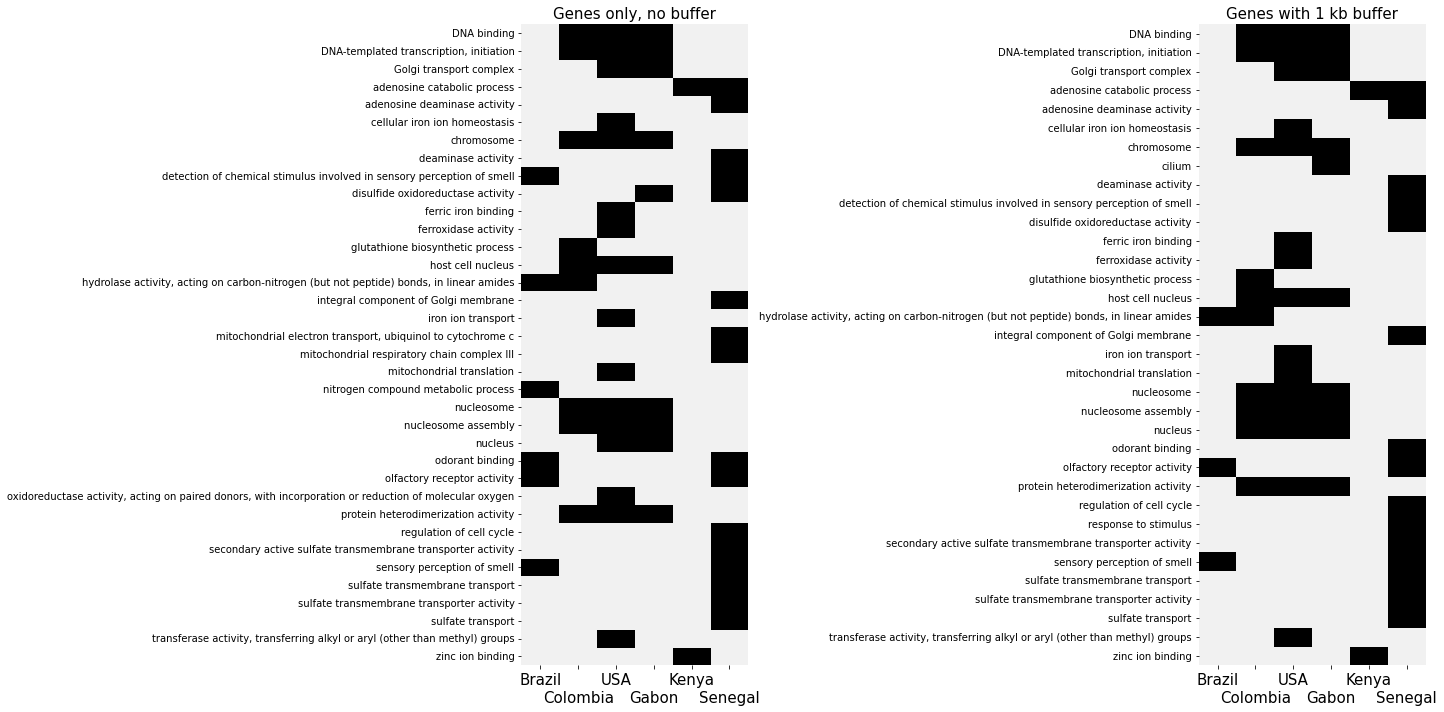

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

sns.heatmap(terms_df_no_buffer, vmin=0, vmax=1, ax=axes[0],
            xticklabels=labels, yticklabels=True,
            cbar=False, cmap=sns.light_palette("black", as_cmap=True))

sns.heatmap(terms_df_buffer, vmin=0, vmax=1, ax=axes[1],
            xticklabels=labels, yticklabels=True,
            cbar=False, cmap=sns.light_palette("black", as_cmap=True))

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
    
axes[0].set_title("Genes only, no buffer", fontsize=15)
axes[1].set_title("Genes with 1 kb buffer", fontsize=15)

plt.tight_layout()

#plt.savefig(outString, bbox_inches="tight")